In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [77]:
data_path = "/workspaces/deteccion_clientes_banco/data/df_resampled.csv"
df = pd.read_csv(data_path, sep=",")
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_freq_encode,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,y
0,56,5,1,261,1,999,0,1.1,93.994000,-36.400000,...,0.101389,1,0,0,1,0,0,0,1,0
1,57,5,1,149,1,999,0,1.1,93.994000,-36.400000,...,0.231014,1,0,0,1,0,0,0,1,0
2,37,5,1,226,1,999,0,1.1,93.994000,-36.400000,...,0.231014,0,0,1,1,0,0,0,1,0
3,40,5,1,151,1,999,0,1.1,93.994000,-36.400000,...,0.055647,1,0,0,1,0,0,0,1,0
4,56,5,1,307,1,999,0,1.1,93.994000,-36.400000,...,0.231014,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46543,84,4,2,166,1,6,2,-1.8,93.749000,-34.600000,...,0.105316,0,0,0,1,0,0,0,0,1
46544,38,7,2,273,1,999,0,-1.7,94.215000,-40.300000,...,0.231014,0,0,0,1,0,0,0,0,1
46545,27,5,3,851,1,999,0,-1.8,92.893000,-46.200000,...,0.231014,0,0,0,1,0,0,1,0,1
46546,49,9,1,208,1,999,1,-3.4,92.399729,-28.643943,...,0.135057,0,0,0,0,0,1,1,0,1


## Training

In [78]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
X_train = train.drop("y", axis = 1)
Y_train = train["y"]

X_test = test.drop("y", axis = 1)
Y_test = test["y"]

In [79]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)

rf_model.fit(X_train, Y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluation

In [80]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1: {f1}")

Accuracy: 0.9165413533834587
Recall: 0.7895791583166333
Precision: 0.8153129849974133
F1: 0.8022397556630185


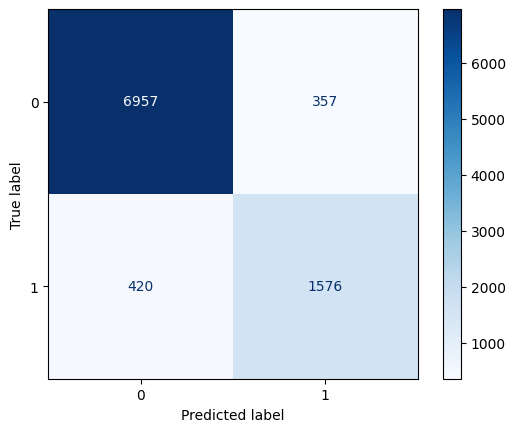

In [84]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

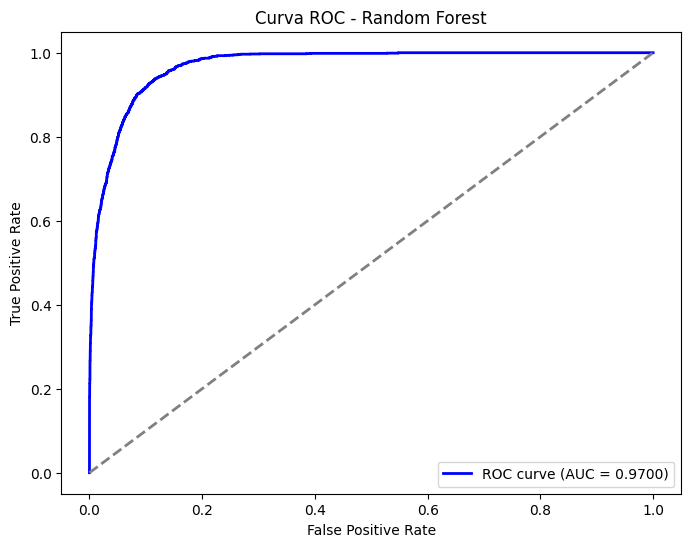

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color="gray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

### Métricas sin Oversampling (36000, 4000)

Accuracy: 0.91

Recall: 0.39

Precision: 0.69

F1: 0.50

### Métricas con Oversampling (36000, 10000)

Accuracy: 0.91

Recall: 0.78

Precision: 0.81

F1: 0.80